In [1]:
import sys
import numpy as np
import json
import torch
import pandas as pd
import os
from pathlib import Path
from scipy.io import loadmat, matlab

import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

sys.path.append(r'C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D')
from Magnetisation.Propagator import Propagator
from Magnetisation.Generator import generator_CNN
from Magnetisation.Train import Magnetisation_CNN_training
from Magnetisation.utils import LoadData

In [2]:

MagX = np.zeros((256,256))
MagY = np.zeros((256,256))

# Shape 1
MagX[40:180,60:120] = 20
MagY[40:180,60:120] = 1

# shape 2
MagX[60:160,120:160] = 5
MagY[60:160,120:160] = 30


MagMag = np.sqrt(MagX**2 + MagY**2)
MagAngle = 180/np.pi *np.arctan(MagY/ MagX)


C:\Users\parax\AppData\Local\Temp/ipykernel_12516/38678219.py:14: RuntimeWarning: invalid value encountered in true_divide
  MagAngle = 180/np.pi *np.arctan(MagY/ MagX)


In [3]:
# Make a magnetic field image

# Define the dictionary for the forward propagation
PropagationOptions = dict()
PropagationOptions['PixelSize'] =  25e-9
PropagationOptions['ImageShape'] = 256
PropagationOptions['NV'] = dict()
PropagationOptions['NV']['Theta'] = 0
PropagationOptions['NV']['Phi'] = 0
PropagationOptions['NV']['Height'] = 50e-9
PropagationOptions['use_stand_off'] = True
PropagationOptions['Magnetisation'] = dict()
PropagationOptions['Magnetisation']['Theta'] = 90 
PropagationOptions['Magnetisation']['Phi'] =  0 
PropagationOptions['FFT'] = dict()


# Make an instance of the propagator class
PROP = Propagator(PropagationOptions,  Magnetisation = MagX)
# Propagate the magnetisation to magnetic field
bnv1, m_to_bx, m_to_by, m_to_bz, u_prop, NVtheta, NVPhi = PROP.bxyz_from_mag(MagX)


PropagationOptions['Magnetisation'] = dict()
PropagationOptions['Magnetisation']['Theta'] = 90 
PropagationOptions['Magnetisation']['Phi'] =  90 
# Make an instance of the propagator class
PROP2 = Propagator(PropagationOptions,  Magnetisation = MagY)
# Propagate the magnetisation to magnetic field
bnv2, m_to_bx, m_to_by, m_to_bz, u_prop, NVtheta, NVPhi = PROP2.bxyz_from_mag(MagY)

unit_conversion_M_to_B =9.27e-24 / 1e-18

B = bnv1 + bnv2
B = B*1e-5

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:356: RuntimeWarning: invalid value encountered in true_divide
  [-(kx ** 2) / k, -(kx * ky) / k, -1j * kx],
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Propagator.py:357: RuntimeWarning: invalid value encountered in true_divide
  [-kx * ky / k, -(ky ** 2 / k), -1j * ky],


C:\Users\parax\AppData\Local\Temp/ipykernel_12516/3010146230.py:10: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(180/np.pi *np.arctan(MagY/ MagX))


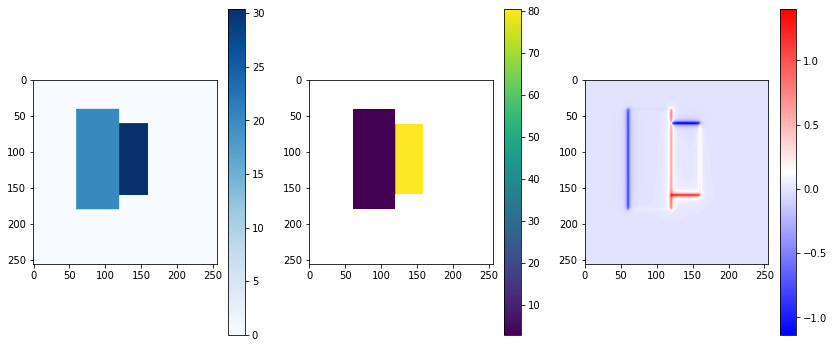

In [4]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(6)

plt.subplot(1,3,1)
plt.imshow(np.sqrt(MagX**2 + MagY**2),cmap='Blues')
plt.colorbar()

plt.subplot(1,3,2)
plt.imshow(180/np.pi *np.arctan(MagY/ MagX))
plt.colorbar()

plt.subplot(1,3,3)
plt.imshow(B*1e3, cmap='bwr')
plt.colorbar()


In [5]:
# Define the dictionary for the forward propagation
PropagationOptions = dict()
PropagationOptions['PixelSize'] = 25e-9
PropagationOptions['ImageShape'] = 256
PropagationOptions['NV'] = dict()
PropagationOptions['NV']['FindTheta']=False
PropagationOptions['NV']['Theta'] = 0
PropagationOptions['NV']['FindPhi']=False
PropagationOptions['NV']['Phi'] = 0
PropagationOptions['NV']['Height'] = 50e-9
PropagationOptions['Magnetisation'] = dict()
PropagationOptions['Magnetisation']['FindTheta']=False
PropagationOptions['Magnetisation']['Theta'] = 0
PropagationOptions['Magnetisation']['FindPhi']= False
PropagationOptions['Magnetisation']['Phi'] = 0
PropagationOptions['FFT'] = dict()
PropagationOptions["FFT"]["PaddingFactor"]= 2
PropagationOptions["FFT"]["performPadding"]= False
PropagationOptions["FFT"]["PaddingMode"] = 'constant'
PropagationOptions['FFT']['Extended'] = False
PropagationOptions['FFT']['Extention'] = 100
PropagationOptions['FFT']['Filter'] = dict()
PropagationOptions['FFT']['Filter']['useHanning'] = False 
PropagationOptions['FFT']['Filter']['useHighCutoff'] = False
PropagationOptions['FFT']['Filter']['useLowCutoff'] = False
PropagationOptions['FFT']['Filter']['LambdaHighCutoff'] = 100e-9
PropagationOptions['FFT']['Filter']['LambdaLowCutoff'] = 7e-06

PROP = Propagator(PropagationOptions, B,PropagationOptions['ImageShape'])
# Extend the data set to the requested square dimensions
# Returns to self.MagneticFieldExtended
# PROP.reshape(PropagationOptions['ImageShape'])

[[-1.42333211e-07 -1.46514915e-07 -1.50788199e-07 ... -1.30309298e-07
  -1.34231748e-07 -1.38238127e-07]
 [-1.45664216e-07 -1.49966874e-07 -1.54364804e-07 ... -1.33326706e-07
  -1.37345856e-07 -1.41459029e-07]
 [-1.49112516e-07 -1.53539826e-07 -1.58074432e-07 ... -1.36437388e-07
  -1.40563222e-07 -1.44786280e-07]
 ...
 [-1.33030663e-07 -1.36900974e-07 -1.40839747e-07 ... -1.21835050e-07
  -1.25498445e-07 -1.29230940e-07]
 [-1.36016177e-07 -1.39982107e-07 -1.44025666e-07 ... -1.24563209e-07
  -1.28307594e-07 -1.32123995e-07]
 [-1.39116021e-07 -1.43187815e-07 -1.47340662e-07 ... -1.27389029e-07
  -1.31217815e-07 -1.35127464e-07]]


In [6]:
# Make the neural network
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
Generator = generator_CNN(Size=1, ImageSize=PROP.options['ImageShape'], channels_in = 1, channels_out = 2).to(device)

In [7]:
# Set the machine learning paramaters for keyword unpacking
ML_options = dict()
ML_options['mlp']=False
ML_options['LossFunction']='L1'
ML_options['Magnetization']=None
ML_options['IntegerOnly']=False
ML_options['PositiveMagnetisationOnly']=True
ML_options['PrintLossValue']=False
ML_options['Epochs']= 1000

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\parax\anaconda3\envs\py_new\lib\site-packages\torch\nn\modules\loss.py:96: UserWarning: Using a target size (torch.Size([256, 256])) that is different to the input size (torch.Size([1, 1, 256, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\parax\anaconda3\envs\py_new\lib\site-packages\torch\autograd\__init__.py:154: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ..\aten\src\ATen\native\Copy.cpp:244.)
  Variable._execution_engine.run_backward(
100%|██████████| 1000/1000 [04:59<00:00,  3.34it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are igno

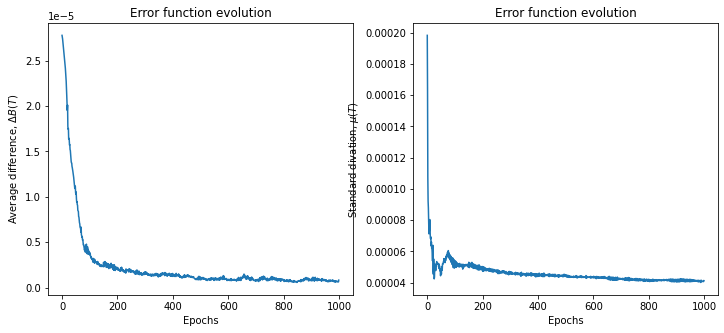

In [8]:
# Train the network
CNN_training = Magnetisation_CNN_training(device, Generator, PROP,ML_options)
bnv_cnn = CNN_training.train_cnn_multiple_channels(**ML_options)

C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Train.py:550: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Original B"] = np.rot90(self.PROP.MagneticFieldExtended[self.PROP.OriginalROI] * unit_conversion_M_to_B, k=1)
C:\Users\parax\Dropbox\Programming\Python\magnetisation_reconstruction\2D\Magnetisation\Train.py:551: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Results["Reconstructed B"] = np.rot90(ReconstructedBnv[self.PROP.OriginalROI] * unit_conversion_M_to_B , k=1)
C:\Users\parax\Drop

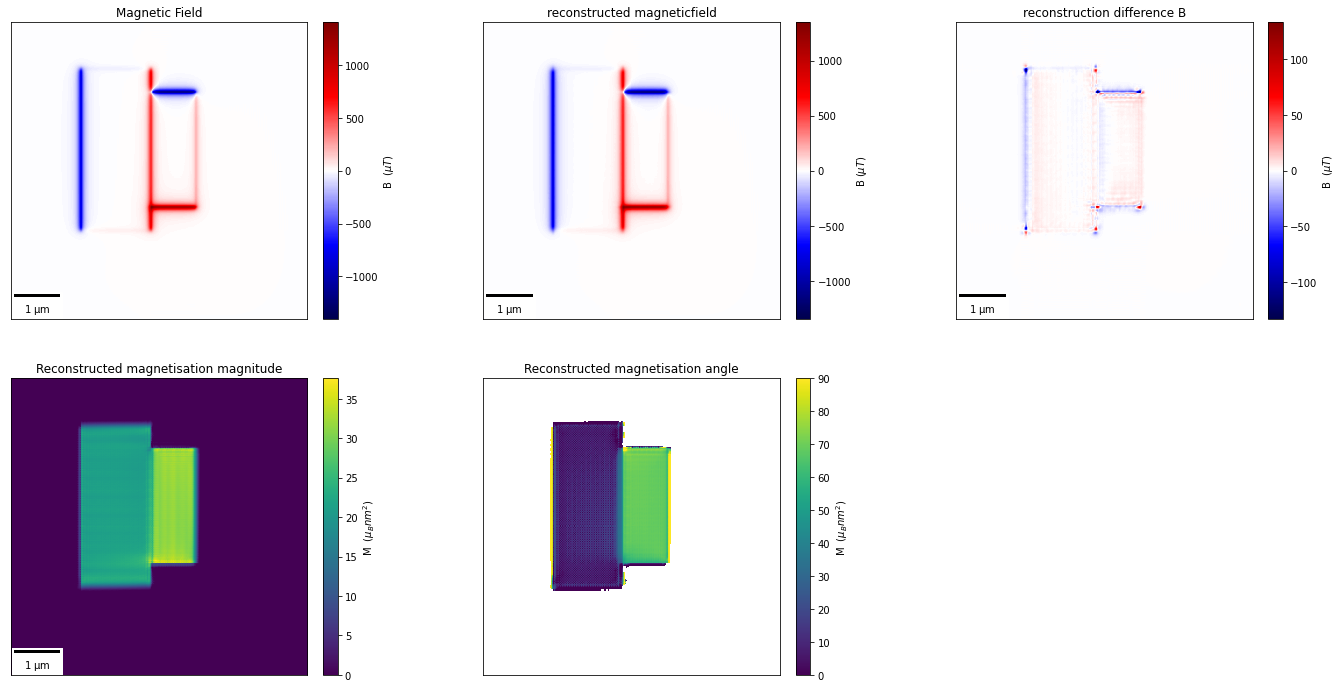

In [9]:
Results = CNN_training.extract_multiple_results()

C:\Users\parax\AppData\Local\Temp/ipykernel_12516/3799940244.py:18: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(180/np.pi *np.arctan(MagY/ MagX), vmin=0, vmax=90)


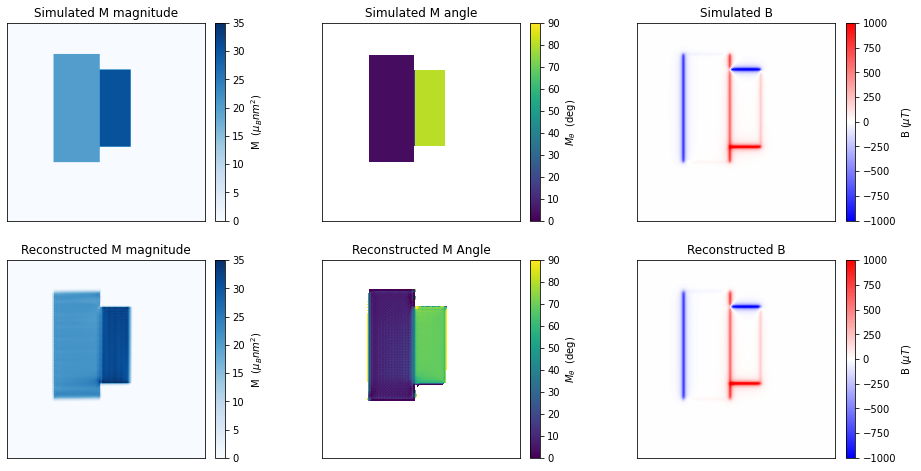

In [10]:
unit_conversion_M_to_B =9.27e-24 / 1e-18

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(8)

plt.subplot(2,3,1)
plt.title('Simulated M magnitude')
plt.imshow(np.sqrt(MagX**2 + MagY**2),cmap='Blues', vmin=0, vmax=35)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="M  ($\mu_B nm^2$)")

plt.subplot(2,3,2)
plt.title('Simulated M angle')
plt.imshow(180/np.pi *np.arctan(MagY/ MagX), vmin=0, vmax=90)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label=r"$M_{\theta}$  (deg)")


plt.subplot(2,3,3)
plt.title('Simulated B')
plt.imshow(B*1e6, cmap='bwr', vmin=-1000, vmax=1000)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="B ($\mu T)$")


plt.subplot(2,3,4)
plt.imshow(Results['Magnetisation Mag'],cmap='Blues', vmin=0, vmax=35)
plt.title('Reconstructed M magnitude')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="M  ($\mu_B nm^2$)")


plt.subplot(2,3,5)
plt.imshow(Results['Magnetisation Angle'], vmin=0, vmax=90)
plt.title('Reconstructed M Angle')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label=r"$M_{\theta}$  (deg)")

plt.subplot(2,3,6)
plt.imshow(Results["Reconstructed B"]* 1e6, cmap='bwr', vmin=-1000, vmax=1000)
plt.title('Reconstructed B')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="B ($\mu T)$")


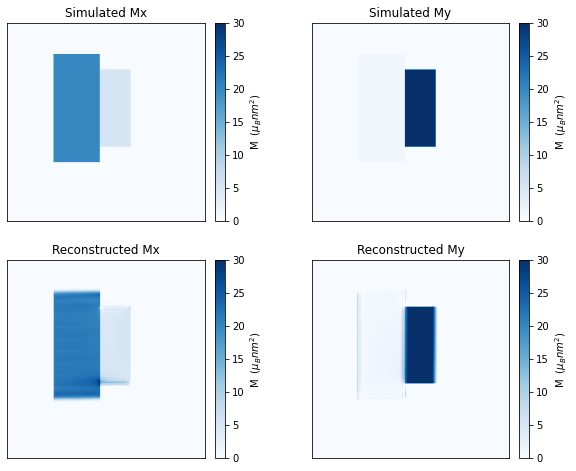

In [11]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)

plt.subplot(2,2,1)
plt.imshow(MagX,cmap='Blues', vmin=0, vmax=30)
plt.title('Simulated Mx')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="M  ($\mu_B nm^2$)")

plt.subplot(2,2,2)
plt.imshow(MagY,cmap='Blues', vmin=0, vmax=30)
plt.title('Simulated My')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="M  ($\mu_B nm^2$)")

plt.subplot(2,2,3)
plt.title('Reconstructed Mx')
plt.imshow(Results["Magnetisation X"],cmap='Blues', vmin=0, vmax=30)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="M  ($\mu_B nm^2$)")

plt.subplot(2,2,4)
plt.title('Reconstructed My')
plt.imshow(Results["Magnetisation Y"],cmap='Blues', vmin=0, vmax=30)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.colorbar(fraction=0.046, pad=0.04,label="M  ($\mu_B nm^2$)")


C:\Users\parax\AppData\Local\Temp/ipykernel_12516/53373963.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(angleImage)


Text(0.5, 1.0, 'Reconstructed Mx')

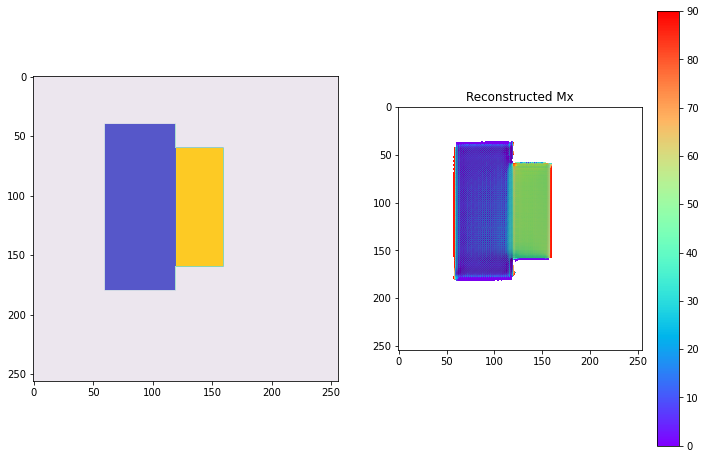

In [12]:
# Making the combined magnetisation plot. 
from matplotlib.colors import Normalize
# Create an alpha channel based on weight values
alphas = Normalize(10, 35, clip=True)(np.abs(MagMag))
alphas2 = Normalize(10, 35, clip = True)(np.abs(Results['Magnetisation Mag']))
alphas = np.clip(alphas, .1, 1)  # alpha value clipped at the bottom at .
alphas2 = np.clip(alphas2, .1, 1)  # alpha value clipped at the bottom at .

fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(8)

angleImage = ax[0].imshow(MagAngle,cmap='rainbow', vmin=0, vmax=90)
fig.colorbar(angleImage)
ax[0].imshow(MagMag, alpha=alphas)
ax[0].set_facecolor("white")
plt.title('Simulated Mx')


angleImage = ax[1].imshow(Results['Magnetisation Angle'],cmap='rainbow', vmin=0, vmax=90)
ax[1].imshow(Results['Magnetisation Angle'], alpha=alphas2)
ax[1].set_facecolor("white")
plt.title('Reconstructed Mx')


In [13]:
from Magnetisation.utils import SaveDictToJson
SaveDictToJson("Nonuniform_Magnetisation_Reconstruction", Results)

serialize NumPy array into JSON and write into a file
Done writing serialized NumPy array into file
